Generate 400 terms and find out optimal weights through Vlad's evolving procedure.

In [1]:
import random
import numpy as np
import pandas as pd
import sys
import matplotlib.pyplot as plt
from fitter import Fitter, get_common_distributions
from deap import tools, base, creator
import seaborn as sns

sys.path.append("../")
from calculus.term import *
from calculus.strategy import *
from calculus.generation import *
from calculus.generation_threading import *

from calculus_utils.drawing import *
from calculus_utils.algorithms import *
from calculus_utils.outliers_cleaning import clear_arr

from vd_env.lambda_env import LambdaEnv
from vd_env.run_greedy_policy import run_greedy_policy
from vd_env.run_e_greedy_policy import run_e_greedy_policy

In [2]:
terms = []
stepsLO = []
stepsRI = []
stepsRand = []

# 4 threads should be enough for generating 400 terms
gen_treads = [
    GenTermsThreadV2(count_terms=100, thread_name=i, mode="all") for i in range(4)
]
for gen_tread in gen_treads:
    gen_tread.start()

for gen_tread in gen_treads:
    if gen_tread.is_alive():
        gen_tread.join()

Th_0: generated 101 terms
Th_1: generated 100 terms
Th_2: generated 102 terms
Th_3: generated 100 terms
Running thread: 0
Thread 0 is doing RI norm
Running thread: 1
Thread 1 is doing RI norm
Running thread: 2
Thread 2 is doing RI norm


  0%|          | 0/101 [00:00<?, ?it/s]

Running thread: 3
Thread 3 is doing RI norm



 20%|█▉        | 20/101 [00:00<00:00, 151.48it/s]

 36%|███▌      | 36/101 [00:00<00:00, 135.47it/s]

 50%|████▉     | 50/101 [00:01<00:01, 35.59it/s] 


 58%|█████▊    | 59/101 [00:02<00:01, 21.89it/s]


 64%|██████▍   | 65/101 [00:04<00:02, 13.33it/s]]


 68%|██████▊   | 69/101 [00:05<00:03,  8.51it/s] 


 71%|███████▏  | 72/101 [00:07<00:05,  5.60it/s]


100%|██████████| 101/101 [00:19<00:00,  1.70it/s][A


 60%|██████    | 60/100 [00:18<00:03, 10.27it/s]

100%|██████████| 101/101 [00:23<00:00,  4.29it/s]


Thread 0 is DONE RI norm
Thread 0 is doing Random norm


  5%|▍         | 5/101 [00:00<00:20,  4.78it/s]

  6%|▌         | 6/101 [00:02<00:24,  3.92it/s]] 

  7%|▋         | 7/101 [00:03<00:58,  1.61it/s]]

 21%|██        | 21/101 [00:14<00:34,  2.30it/s]

 22%|██▏       | 22/101 [00:15<00:40,  1.97it/s]

 24%|██▍       | 24/101 [00:18<01:21,  1.05s/it]

 25%|██▍       | 25/101 [00:19<01:16,  1.00s/it]

 26%|██▌       | 26/101 [00:20<01:17,  1.04s/it]

 27%|██▋       | 27/101 [00:21<01:18,  1.06s/it]

 28%|██▊       | 28/101 [00:22<01:17,  1.06s/it]

 29%|██▊       | 29/101 [00:23<01:15,  1.05s/it]

 30%|██▉       | 30/101 [00:24<01:17,  1.08s/it]

 31%|███       | 31/101 [00:25<01:17,  1.11s/it]

 71%|███████   | 72/102 [00:49<00:24,  1.21it/s]


 32%|███▏      | 32/101 [00:26<01:05,  1.06it/s]

 33%|███▎      | 33/101 [00:27<00:59,  1.15it/s]

 34%|███▎      | 34/101 [00:28<01:07,  1.01s/it]

100%|██████████| 102/102 [00:54<00:00,  1.85it/s][A

 26%|██▌       | 26/100 [00:56<01:14,  1.01s/it]

Thread 2 is DONE RI norm
Thread 2 is doing Random norm


 39%|███▊      | 39/101 [00:32<00:56,  1.11it/s]

 40%|███▉      | 40/101 [00:33<00:49,  1.22it/s]

 41%|████      | 41/101 [00:35<00:52,  1.14it/s]

 42%|████▏     | 42/101 [00:36<00:58,  1.01it/s]

 43%|████▎     | 43/101 [00:37<01:00,  1.05s/it]

 44%|████▎     | 44/101 [00:38<01:02,  1.10s/it]

 45%|████▍     | 45/101 [00:39<01:01,  1.10s/it]

 46%|████▌     | 46/101 [00:41<01:02,  1.14s/it]

 47%|████▋     | 47/101 [00:41<00:59,  1.10s/it]

 48%|████▊     | 48/101 [00:42<00:57,  1.08s/it]

 49%|████▊     | 49/101 [00:43<00:52,  1.01s/it]

 50%|████▉     | 50/101 [00:44<00:53,  1.05s/it]

 40%|████      | 40/100 [01:11<01:02,  1.04s/it]

 41%|████      | 41/100 [01:13<01:22,  1.39s/it]

 42%|████▏     | 42/100 [01:15<01:30,  1.56s/it]

 43%|████▎     | 43/100 [01:16<01:28,  1.54s/it]

 50%|█████     | 51/101 [00:53<02:49,  3.39s/it]

 51%|█████▏    | 52/101 [00:54<02:08,  2.63s/it]

 52%|█████▏    | 53/101 [00:55<01:41,  2.12s/it]

 53%|█████▎    | 54/101 [00:56<01:26,  1.83s/it]



Thread 0 is DONE Random norm
Thread 0 is DONE




 99%|█████████▉| 99/100 [02:20<00:01,  1.10s/it]

100%|██████████| 100/100 [02:21<00:00,  1.12s/it]

 50%|█████     | 51/102 [01:23<00:57,  1.13s/it]

100%|██████████| 100/100 [02:23<00:00,  1.43s/it][A


 52%|█████▏    | 53/102 [01:24<00:43,  1.12it/s]

Thread 1 is DONE RI norm
Thread 1 is doing Random norm




 53%|█████▎    | 54/102 [01:25<00:37,  1.26it/s]

  0%|          | 0/100 [00:00<?, ?it/s]1.41it/s]

  3%|▎         | 3/100 [00:00<00:03, 28.84it/s]]

  6%|▌         | 6/100 [00:01<00:16,  5.78it/s]]

  8%|▊         | 8/100 [00:02<00:20,  4.39it/s]]

  9%|▉         | 9/100 [00:02<00:32,  2.84it/s]]

 59%|█████▉    | 60/102 [01:29<00:27,  1.51it/s]

 60%|█████▉    | 61/102 [01:30<00:31,  1.29it/s]

 61%|██████    | 62/102 [01:31<00:29,  1.33it/s]

 62%|██████▏   | 63/102 [01:32<00:31,  1.26it/s]

 10%|█         | 10/100 [00:06<01:48,  1.21s/it]

 11%|█         | 11/100 [00:07<01:34,  1.06s/it]

 12%|█▏        | 12/100 [00:08<01:20,  1.09it/s]

 13%|█▎        | 13/100 [00:08<01:11,  1.22it/s]

 14%|█▍        | 14/100 [00:09<01:03,  1.35it/s]

 15%|█▌        | 15/100 [00:09<00:57,  1.48it/s]

 16%|█▌        | 16/100 [00:10<00:52,  1.59it/s]

 17%|█▋        | 17/100 [00:11<00:57,  1.44it/s]

 18%|█▊        | 18/100 [00:11<00:54,  1.52it/s]

 19%|█▉        | 19/100 [00:12<00:53,  1.51it/s]

Thread 2 is DONE Random norm
Thread 2 is DONE


100%|██████████| 100/100 [01:20<00:00,  1.25it/s]


Thread 1 is DONE Random norm
Thread 1 is DONE





100%|██████████| 100/100 [03:51<00:00,  2.31s/it][A


Thread 3 is DONE RI norm
Thread 3 is doing Random norm


100%|██████████| 100/100 [00:10<00:00,  9.59it/s]


Thread 3 is DONE Random norm
Thread 3 is DONE


TypeError: 'list' object is not callable

In [5]:
for gen_tread in gen_treads:
    terms += gen_tread.get_terms()
    stepsLO += gen_tread.get_stepsLO()
    stepsRI += gen_tread.get_stepsRI()
    stepsRand += gen_tread.get_stepsRand()

In [6]:
print(f"Total LO norm terms count: {len(terms)}\n")
print(f"Terms' vertices: {list(map(lambda term: term.verticesNumber, terms))}\n")
print(f"Terms' redexes: {list(map(lambda term: len(term.redexes), terms))}")

Total LO norm terms count: 403

Terms' vertices: [55, 52, 55, 59, 54, 55, 54, 58, 58, 57, 53, 57, 57, 59, 54, 53, 58, 54, 51, 54, 54, 53, 53, 53, 55, 51, 53, 58, 56, 51, 51, 57, 59, 56, 58, 55, 55, 59, 51, 52, 57, 59, 57, 59, 59, 59, 52, 57, 58, 55, 53, 57, 58, 55, 53, 56, 58, 53, 56, 54, 54, 54, 58, 59, 52, 52, 57, 53, 59, 55, 57, 58, 56, 55, 55, 51, 59, 59, 56, 59, 52, 53, 53, 51, 55, 55, 57, 58, 54, 55, 52, 58, 54, 56, 58, 58, 56, 53, 52, 59, 53, 59, 53, 51, 57, 53, 56, 52, 52, 53, 53, 52, 53, 51, 58, 56, 53, 54, 58, 56, 56, 52, 57, 54, 51, 51, 55, 54, 55, 54, 57, 56, 57, 54, 53, 56, 53, 57, 56, 59, 55, 53, 52, 55, 57, 57, 52, 51, 56, 52, 53, 58, 51, 56, 51, 56, 56, 55, 53, 56, 57, 57, 52, 58, 54, 58, 56, 51, 57, 57, 51, 55, 58, 58, 59, 53, 53, 59, 57, 59, 52, 55, 58, 52, 56, 52, 55, 57, 52, 53, 59, 55, 54, 51, 58, 53, 53, 58, 55, 58, 51, 59, 57, 56, 54, 53, 53, 53, 53, 56, 59, 53, 54, 56, 54, 51, 54, 59, 56, 57, 53, 54, 57, 53, 51, 52, 53, 51, 59, 58, 51, 52, 57, 58, 52, 59, 51, 51

In [7]:
print(f"steps LO: {stepsLO}\n")
print(f"steps RI: {stepsRI}\n")
print(f"steps Rand: {stepsRand}")

steps LO: [2, 17, 6, 18, 7, 2, 12, 59, 6, 1, 8, 4, 4, 20, 5, 17, 3, 1, 2, 7, 4, 6, 4, 18, 5, 2, 14, 1, 6, 16, 13, 6, 2, 13, 4, 5, 7, 1, 3, 2, 4, 6, 14, 5, 2, 5, 4, 5, 13, 10, 10, 10, 4, 16, 1, 5, 9, 6, 1, 13, 6, 3, 6, 1, 5, 4, 5, 2, 10, 2, 30, 15, 3, 21, 5, 6, 11, 13, 11, 6, 31, 3, 4, 5, 2, 6, 2, 5, 5, 4, 8, 10, 23, 6, 1, 2, 1, 21, 4, 8, 2, 8, 15, 10, 3, 17, 6, 6, 3, 1, 1, 7, 4, 9, 4, 3, 2, 7, 1, 1, 2, 12, 11, 5, 9, 8, 7, 4, 7, 1, 4, 6, 6, 4, 5, 10, 2, 30, 14, 5, 1, 3, 4, 2, 15, 35, 9, 2, 93, 7, 3, 2, 4, 5, 4, 1, 10, 7, 25, 7, 5, 5, 4, 18, 17, 10, 3, 5, 3, 4, 4, 2, 21, 4, 6, 1, 9, 18, 10, 10, 2, 18, 5, 4, 5, 2, 3, 3, 3, 4, 5, 1, 11, 3, 4, 10, 3, 4, 15, 5, 4, 9, 1, 1, 7, 13, 44, 5, 7, 17, 11, 7, 1, 5, 2, 12, 11, 4, 1, 29, 4, 24, 5, 12, 8, 1, 5, 4, 6, 3, 4, 5, 27, 7, 13, 11, 18, 2, 3, 8, 3, 2, 3, 20, 24, 14, 4, 8, 4, 16, 5, 3, 4, 2, 3, 6, 5, 11, 18, 22, 9, 2, 5, 7, 6, 4, 1, 11, 3, 1, 3, 5, 2, 10, 8, 62, 3, 3, 13, 2, 3, 7, 3, 2, 5, 19, 6, 13, 1, 7, 14, 6, 3, 19, 18, 12, 11, 11, 5, 9, 10, 

In [8]:
print(f"max LO: {max(stepsLO)}")
print(f"max RI: {max(stepsRI)}")
print(f"max Rand: {max(stepsRand)}")

max LO: 93
max RI: inf
max Rand: inf


Fitting 8 distributions: 100%|██████████| 8/8 [00:00<00:00, 23.59it/s]


number of not normalized terms: 0
          sumsquare_error          aic          bic  kl_div  ks_statistic  \
lognorm          0.003660  1393.762867 -4660.495018     inf      0.084465   
exponpow         0.023893  1755.384258 -3904.446725     inf      0.322726   
rayleigh         0.024640  3095.593044 -3898.036821     inf      0.226636   
norm             0.032631  3421.164525 -3784.834349     inf      0.210907   
powerlaw         0.034446   985.077848 -3757.022275     inf      0.394588   

             ks_pvalue  
lognorm   5.979287e-03  
exponpow  7.479758e-38  
rayleigh  1.132435e-18  
norm      3.309611e-16  
powerlaw  4.477330e-57  
{'lognorm': {'s': 0.9574045874865631, 'loc': 0.242653894384255, 'scale': 5.100390969588415}}
Norm distribution: (8.148883374689825, 8.899642700263527)


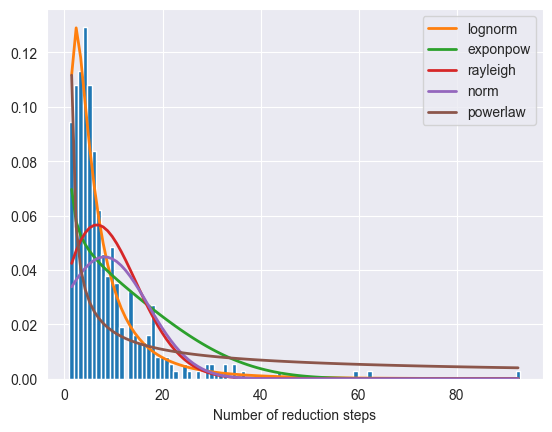

Fitting 8 distributions: 100%|██████████| 8/8 [00:00<00:00, 21.44it/s]

Log Norm distribution params: (1.6995550941829478, 0.8941352513613474); expected value = 8.160406778553488


In [9]:
draw_hist(stepsLO)

Fitting 8 distributions: 100%|██████████| 8/8 [00:00<00:00, 33.47it/s]


number of not normalized terms: 8
          sumsquare_error          aic          bic  kl_div  ks_statistic  \
lognorm          0.135351  1120.294225 -3133.678399     inf      0.073900   
chi2             0.137352  1199.184231 -3127.881716     inf      0.091477   
gamma            0.137352  1199.177475 -3127.881386     inf      0.091480   
rayleigh         0.144250  1514.100556 -3114.502771     inf      0.162250   
norm             0.153182  1720.285466 -3090.774061     inf      0.154013   

             ks_pvalue  
lognorm   2.539075e-02  
chi2      2.510233e-03  
gamma     2.509080e-03  
rayleigh  1.490290e-09  
norm      1.199845e-08  
{'lognorm': {'s': 0.5410890309059935, 'loc': -0.6976045836231628, 'scale': 9.243491381061318}}
Norm distribution: (10.010126582278481, 6.313730164615198)


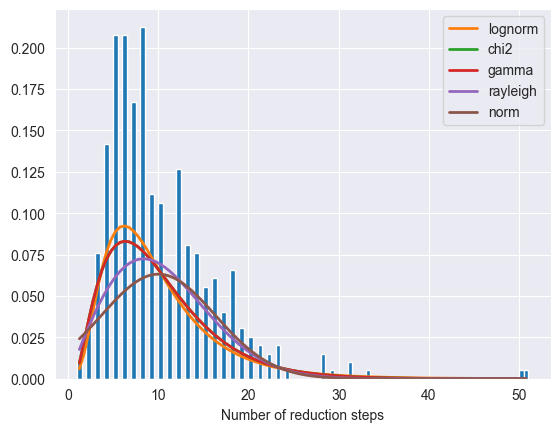

Fitting 8 distributions: 100%|██████████| 8/8 [00:00<00:00, 23.95it/s]

Log Norm distribution params: (2.1307717976891065, 0.5958050557288348); expected value = 10.05694690363323


In [10]:
draw_hist(stepsRI)

Fitting 8 distributions: 100%|██████████| 8/8 [00:00<00:00, 27.49it/s]


number of not normalized terms: 4
          sumsquare_error          aic          bic  kl_div  ks_statistic  \
lognorm          0.011624  1224.266231 -4149.054370     inf      0.055435   
gamma            0.017940  1342.246258 -3975.898045     inf      0.098556   
chi2             0.017940  1342.245282 -3975.895631     inf      0.098553   
rayleigh         0.035135  1806.979399 -3713.694897     inf      0.214377   
exponpow         0.040516  1347.017331 -3650.844838     inf      0.156169   

             ks_pvalue  
lognorm   1.657986e-01  
gamma     7.955975e-04  
chi2      7.960164e-04  
rayleigh  1.422732e-16  
exponpow  5.774612e-09  
{'lognorm': {'s': 0.7710068520997513, 'loc': 0.4794776215673213, 'scale': 7.038242742841421}}
Norm distribution: (10.047117794486216, 8.907955131522733)


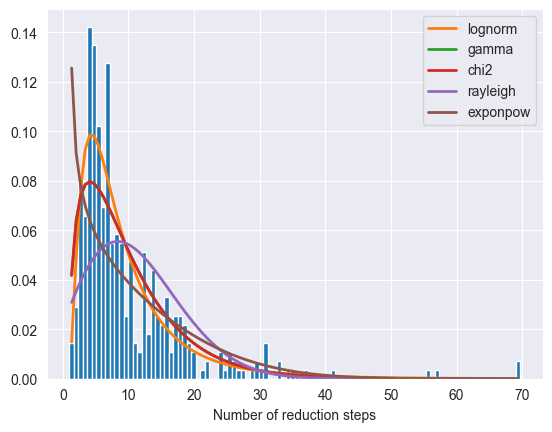

Fitting 8 distributions: 100%|██████████| 8/8 [00:00<00:00, 30.07it/s]

Log Norm distribution params: (2.036165523206631, 0.7117890777094004); expected value = 9.869876777120124


In [11]:
draw_hist(stepsRand)

Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 26.14it/s]


expected number of steps to normalize using Mixed strategy= 9.556513084763342


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 33.57it/s]


expected number of steps to normalize using Mixed strategy= 10.346403539242866


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 23.72it/s]


expected number of steps to normalize using Mixed strategy= 8.970350609200912


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 29.03it/s]


expected number of steps to normalize using Mixed strategy= 8.967089622759367


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 30.09it/s]


expected number of steps to normalize using Mixed strategy= 9.565180416144479


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 23.38it/s]


expected number of steps to normalize using Mixed strategy= 8.530278957565384


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 24.93it/s]


expected number of steps to normalize using Mixed strategy= 9.110131661998395


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 32.84it/s]


expected number of steps to normalize using Mixed strategy= 9.949167811409318


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 23.75it/s]


expected number of steps to normalize using Mixed strategy= 8.537457795574396


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 35.43it/s]


expected number of steps to normalize using Mixed strategy= 10.278082264628175


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 25.13it/s]


expected number of steps to normalize using Mixed strategy= 8.985738763658649


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 28.57it/s]


expected number of steps to normalize using Mixed strategy= 9.824314301220452


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 27.02it/s]


expected number of steps to normalize using Mixed strategy= 9.59625806608469


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 29.31it/s]


expected number of steps to normalize using Mixed strategy= 9.844818641047175


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 26.86it/s]


expected number of steps to normalize using Mixed strategy= 8.420980821766301


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 23.25it/s]


expected number of steps to normalize using Mixed strategy= 8.44586273714578


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 27.86it/s]


expected number of steps to normalize using Mixed strategy= 9.422769099510413


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 35.29it/s]


expected number of steps to normalize using Mixed strategy= 10.016358222704753


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 27.94it/s]


expected number of steps to normalize using Mixed strategy= 8.474297902712728


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 28.66it/s]


expected number of steps to normalize using Mixed strategy= 10.107801671495404
gen	nevals	min    	avg    
0  	20    	8.42098	9.34749


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 26.62it/s]


expected number of steps to normalize using Mixed strategy= 8.42134771668218


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 25.93it/s]


expected number of steps to normalize using Mixed strategy= 9.004347238066963


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 25.71it/s]


expected number of steps to normalize using Mixed strategy= 9.145585688873933


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 31.57it/s]


expected number of steps to normalize using Mixed strategy= 9.690021520817696


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 23.88it/s]


expected number of steps to normalize using Mixed strategy= 8.625327536625793


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 22.84it/s]


expected number of steps to normalize using Mixed strategy= 8.516683798919079


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 24.52it/s]


expected number of steps to normalize using Mixed strategy= 8.976506507692099


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 29.70it/s]


expected number of steps to normalize using Mixed strategy= 9.100883013968712


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 23.87it/s]


expected number of steps to normalize using Mixed strategy= 8.638860669245313


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 27.69it/s]


expected number of steps to normalize using Mixed strategy= 8.38888053855697


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 29.89it/s]


expected number of steps to normalize using Mixed strategy= 9.755480803552066


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 31.91it/s]


expected number of steps to normalize using Mixed strategy= 9.724833356733981
1  	12    	8.38888	10.9186


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 32.04it/s]


expected number of steps to normalize using Mixed strategy= 9.723822992297654


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 23.88it/s]


expected number of steps to normalize using Mixed strategy= 8.617013131971165


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 26.08it/s]


expected number of steps to normalize using Mixed strategy= 8.819247070128574


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 30.71it/s]


expected number of steps to normalize using Mixed strategy= 8.550666724465396


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 30.61it/s]


expected number of steps to normalize using Mixed strategy= 9.79434087155725


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 23.62it/s]


expected number of steps to normalize using Mixed strategy= 8.458256357406997


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 29.50it/s]


expected number of steps to normalize using Mixed strategy= 8.955006681700185


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 23.62it/s]


expected number of steps to normalize using Mixed strategy= 8.817011865531216


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 31.35it/s]


expected number of steps to normalize using Mixed strategy= 9.410028294991386


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 24.25it/s]


expected number of steps to normalize using Mixed strategy= 8.581198389674112


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 27.94it/s]


expected number of steps to normalize using Mixed strategy= 8.451720908527685


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 27.35it/s]


expected number of steps to normalize using Mixed strategy= 8.415308109195562


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 24.32it/s]


expected number of steps to normalize using Mixed strategy= 8.660701011198812


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 22.61it/s]


expected number of steps to normalize using Mixed strategy= 8.431392123293625


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 23.68it/s]


expected number of steps to normalize using Mixed strategy= 8.672232893941963
2  	15    	8.38888	12.5298


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 24.06it/s]


expected number of steps to normalize using Mixed strategy= 8.678418192988792


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 26.78it/s]


expected number of steps to normalize using Mixed strategy= 8.409542012790492


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 27.77it/s]


expected number of steps to normalize using Mixed strategy= 8.432825028466787


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 24.12it/s]


expected number of steps to normalize using Mixed strategy= 8.681916723158448


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 24.31it/s]


expected number of steps to normalize using Mixed strategy= 8.562405707259362


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 29.65it/s]


expected number of steps to normalize using Mixed strategy= 9.374709908422505


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 23.87it/s]


expected number of steps to normalize using Mixed strategy= 8.720233150899588


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 23.93it/s]


expected number of steps to normalize using Mixed strategy= 8.62908281389734


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 22.95it/s]


expected number of steps to normalize using Mixed strategy= 8.497032913169061


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 23.99it/s]


expected number of steps to normalize using Mixed strategy= 8.422596983207077


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 27.04it/s]


expected number of steps to normalize using Mixed strategy= 8.56628452288879


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 23.29it/s]


expected number of steps to normalize using Mixed strategy= 8.488791735091917


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 27.84it/s]


expected number of steps to normalize using Mixed strategy= 8.46505951333725


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 22.84it/s]


expected number of steps to normalize using Mixed strategy= 8.624252087758544


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 23.49it/s]


expected number of steps to normalize using Mixed strategy= 8.454261401701514


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 29.50it/s]


expected number of steps to normalize using Mixed strategy= 8.375137121900071
3  	16    	8.38888	12.9008


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 23.23it/s]


expected number of steps to normalize using Mixed strategy= 8.411824969216994


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 23.43it/s]


expected number of steps to normalize using Mixed strategy= 8.65192505175363


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 27.86it/s]


expected number of steps to normalize using Mixed strategy= 8.433711824543188


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 27.52it/s]


expected number of steps to normalize using Mixed strategy= 8.382092356081461


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 24.30it/s]


expected number of steps to normalize using Mixed strategy= 8.661500538919709


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 23.68it/s]


expected number of steps to normalize using Mixed strategy= 8.41376181370371


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 22.66it/s]


expected number of steps to normalize using Mixed strategy= 8.6701726024102


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 27.18it/s]


expected number of steps to normalize using Mixed strategy= 8.433124337575128


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 28.03it/s]


expected number of steps to normalize using Mixed strategy= 8.446140144448915


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 27.69it/s]


expected number of steps to normalize using Mixed strategy= 8.419198242203121


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 32.02it/s]


expected number of steps to normalize using Mixed strategy= 9.340263743160499


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 24.86it/s]


expected number of steps to normalize using Mixed strategy= 8.627733161962864


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 23.25it/s]


expected number of steps to normalize using Mixed strategy= 8.442972151447501


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 24.38it/s]


expected number of steps to normalize using Mixed strategy= 8.499229797004045
4  	14    	8.38209	10.0752


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 29.03it/s]


expected number of steps to normalize using Mixed strategy= 8.368708457328438


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 23.93it/s]


expected number of steps to normalize using Mixed strategy= 8.427875578113515


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 23.25it/s]


expected number of steps to normalize using Mixed strategy= 8.385441694326717


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 27.69it/s]


expected number of steps to normalize using Mixed strategy= 8.457150965629538


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 23.55it/s]


expected number of steps to normalize using Mixed strategy= 8.383482633490285


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 27.02it/s]


expected number of steps to normalize using Mixed strategy= 8.572937275525105


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 31.57it/s]


expected number of steps to normalize using Mixed strategy= 8.442627795873378


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 27.87it/s]


expected number of steps to normalize using Mixed strategy= 8.418061212389011


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 23.49it/s]


expected number of steps to normalize using Mixed strategy= 8.597422886597899


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 28.03it/s]


expected number of steps to normalize using Mixed strategy= 8.440137206486504


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 23.93it/s]


expected number of steps to normalize using Mixed strategy= 8.405798994755266


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 24.65it/s]


expected number of steps to normalize using Mixed strategy= 8.668209319216897


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 25.93it/s]


expected number of steps to normalize using Mixed strategy= 8.388792803643732


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 29.03it/s]


expected number of steps to normalize using Mixed strategy= 8.419252641345478
5  	14    	8.36871	8.69383


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 25.93it/s]


expected number of steps to normalize using Mixed strategy= 8.39476867896968


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 27.52it/s]


expected number of steps to normalize using Mixed strategy= 8.379351781247854


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 24.19it/s]


expected number of steps to normalize using Mixed strategy= 8.50582399752291


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 22.90it/s]


expected number of steps to normalize using Mixed strategy= 8.570806869284517


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 23.43it/s]


expected number of steps to normalize using Mixed strategy= 8.388806049820367


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 23.25it/s]


expected number of steps to normalize using Mixed strategy= 8.494753490309595


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 23.68it/s]


expected number of steps to normalize using Mixed strategy= 8.36309249880759


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 23.83it/s]


expected number of steps to normalize using Mixed strategy= 8.602786774189724


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 26.51it/s]


expected number of steps to normalize using Mixed strategy= 8.269471872992876


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 24.69it/s]


expected number of steps to normalize using Mixed strategy= 8.41202671871233


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 25.78it/s]


expected number of steps to normalize using Mixed strategy= 8.395505832604702


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 27.35it/s]


expected number of steps to normalize using Mixed strategy= 8.32432047612579


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 23.87it/s]


expected number of steps to normalize using Mixed strategy= 8.384006081130172


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 23.19it/s]


expected number of steps to normalize using Mixed strategy= 8.37345972589033
6  	14    	8.32432	11.2435


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 27.35it/s]


expected number of steps to normalize using Mixed strategy= 8.379651386570679


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 26.86it/s]


expected number of steps to normalize using Mixed strategy= 8.393923584806423


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 23.99it/s]


expected number of steps to normalize using Mixed strategy= 8.520781133696028


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 23.99it/s]


expected number of steps to normalize using Mixed strategy= 8.361673906355847


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 26.26it/s]


expected number of steps to normalize using Mixed strategy= 8.394408009688746


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 22.05it/s]


expected number of steps to normalize using Mixed strategy= 8.556317216340522


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 23.50it/s]


expected number of steps to normalize using Mixed strategy= 8.353200583515452


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 25.86it/s]


expected number of steps to normalize using Mixed strategy= 8.407042752412867


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 25.28it/s]


expected number of steps to normalize using Mixed strategy= 8.751794934520854


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 25.64it/s]


expected number of steps to normalize using Mixed strategy= 8.371765120144332


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 26.62it/s]


expected number of steps to normalize using Mixed strategy= 8.367499892848997


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 26.86it/s]


expected number of steps to normalize using Mixed strategy= 8.369783977359381


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 26.94it/s]


expected number of steps to normalize using Mixed strategy= 8.371819329353396
7  	13    	8.32432	8.5018 
- Best solution is: 
p =  [0.8667778683858962, 0.003995036571233821, 0.06558686321791522, 0.009521764940918255]


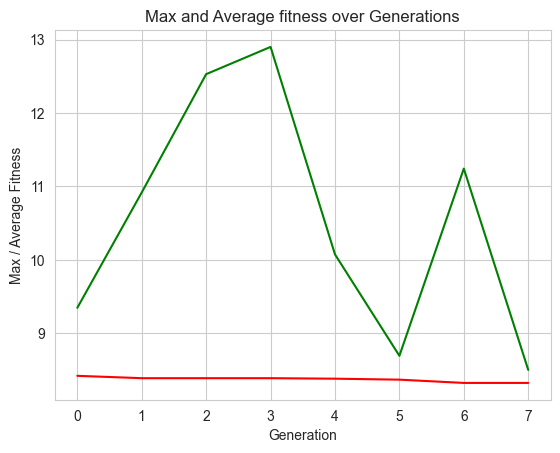

In [13]:
STRATEGIES = [
    LeftmostOutermostStrategy(),
    RightmostInnermostStrategy(),
    LeftmostInnermostStrategy(),
    RightmostOutermostStrategy(),
    RandomStrategy(),
]
RANDOM_AVERAGE_COUNT = 20

BOUNDS_LOW = [0.1, 0.0, 0.0, 0.0]
BOUNDS_HIGH = [
    1.0,
    1.0,
    1.0,
    1.0,
]

NUM_OF_PARAMS = len(BOUNDS_HIGH)

# Genetic Algorithm constants:
POPULATION_SIZE = 20
P_CROSSOVER = 0.9  # probability for crossover
P_MUTATION = 0.3  # probability for mutating an individual
MAX_GENERATIONS = 7
HALL_OF_FAME_SIZE = 4
CROWDING_FACTOR = 10  # crowding factor for crossover and mutation

toolbox = base.Toolbox()

# define a single objective, maximizing fitness strategy:
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
# create the Individual class based on list:
creator.create("Individual", list, fitness=creator.FitnessMin)

# define the hyperparameter attributes individually:
for i in range(NUM_OF_PARAMS):
    # "hyperparameter_0", "hyperparameter_1", ...
    toolbox.register(
        "hyperparameter_" + str(i), random.uniform, BOUNDS_LOW[i], BOUNDS_HIGH[i]
    )

# create a tuple containing an attribute generator for each param searched:
hyperparameters = ()
for i in range(NUM_OF_PARAMS):
    hyperparameters = hyperparameters + (
        toolbox.__getattribute__("hyperparameter_" + str(i)),
    )


# create the individual operator to fill up an Individual instance:
def individual_creator() -> creator.Individual:
    indv = [0 for _ in range(NUM_OF_PARAMS)]
    for i in range(NUM_OF_PARAMS):
        indv[i] = random.uniform(BOUNDS_LOW[i], 1 - sum(indv))
    return creator.Individual(indv)


# create the population operator to generate a list of individuals:
toolbox.register("populationCreator", tools.initRepeat, list, individual_creator)


# fitness calculation
def fitness(individual):
    p = individual.copy()
    p.append(max(0, 1 - sum(individual)))
    steps = [
        sum(
            [
                term.normalize(MixedStrategy(STRATEGIES, p))[1]
                for i in range(RANDOM_AVERAGE_COUNT)
            ]
        )
        / RANDOM_AVERAGE_COUNT
        for term in terms
    ]
    steps = list(filter(lambda x: x != float("inf"), steps))

    distributions = get_common_distributions()
    distributions.remove("expon")
    f_ln = Fitter([np.log(step) for step in steps], distributions=distributions)
    f_ln.fit()

    mu, sigma = f_ln.fitted_param["norm"]
    result = np.e ** (mu + (sigma**2) / 2)
    print(
        "expected number of steps to normalize using Mixed strategy= {}".format(result)
    )
    if 1 - sum(individual) < 0:
        result += 100 * (sum(individual) - 1)
    return (result,)


toolbox.register("evaluate", fitness)

# genetic operators:
toolbox.register("select", tools.selTournament, tournsize=2)
toolbox.register(
    "mate",
    tools.cxSimulatedBinaryBounded,
    low=BOUNDS_LOW,
    up=BOUNDS_HIGH,
    eta=CROWDING_FACTOR,
)
toolbox.register(
    "mutate",
    tools.mutPolynomialBounded,
    low=BOUNDS_LOW,
    up=BOUNDS_HIGH,
    eta=CROWDING_FACTOR,
    indpb=1.0 / NUM_OF_PARAMS,
)

# create initial population (generation 0):
population = toolbox.populationCreator(n=POPULATION_SIZE)

# prepare the statistics object:
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("min", np.min)
stats.register("avg", np.mean)

# define the hall-of-fame object:
hof = tools.HallOfFame(HALL_OF_FAME_SIZE)

# perform the Genetic Algorithm flow with hof feature added:
population, logbook = eaSimpleWithElitism(
    population,
    toolbox,
    cxpb=P_CROSSOVER,
    mutpb=P_MUTATION,
    ngen=MAX_GENERATIONS,
    stats=stats,
    halloffame=hof,
    verbose=True,
)

# print best solution found:
print("- Best solution is: ")
print("p = ", hof.items[0])

# extract statistics:
maxFitnessValues, meanFitnessValues = logbook.select("min", "avg")
# plot statistics:
sns.set_style("whitegrid")
plt.plot(maxFitnessValues, color="red")
plt.plot(meanFitnessValues, color="green")
plt.xlabel("Generation")
plt.ylabel("Max / Average Fitness")
plt.title("Max and Average fitness over Generations")
plt.show()

In [18]:
hof.items[0]

[0.8667778683858962,
 0.003995036571233821,
 0.06558686321791522,
 0.009521764940918255,
 0.05411846688403654]

Fitting 8 distributions: 100%|██████████| 8/8 [00:00<00:00, 23.45it/s]


number of not normalized terms: 0
          sumsquare_error          aic          bic  kl_div  ks_statistic  \
lognorm          0.001809  1363.402888 -4944.549299     inf      0.063935   
chi2             0.010068  1544.797825 -4252.727390     inf      0.122479   
exponpow         0.012235  1785.268863 -4174.163704     inf      0.113619   
rayleigh         0.024829  2869.455488 -3894.957694     inf      0.208906   
norm             0.032440  3171.199487 -3787.205646     inf      0.202197   

             ks_pvalue  
lognorm   7.097606e-02  
chi2      9.991890e-06  
exponpow  5.479026e-05  
rayleigh  6.610540e-16  
norm      6.395504e-15  
{'lognorm': {'s': 0.9446513379904475, 'loc': 0.2932641074537451, 'scale': 5.27675092256743}}
Norm distribution: (8.381637717121588, 8.85302854617959)


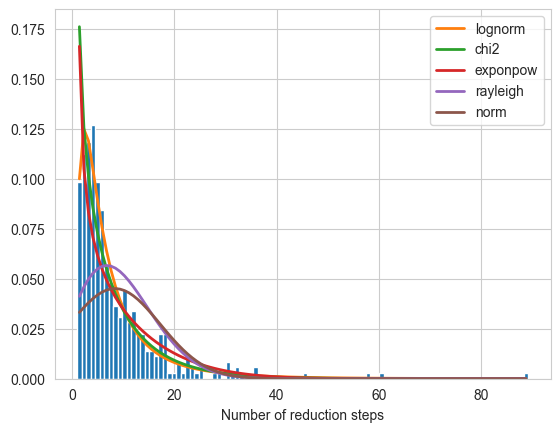

Fitting 8 distributions: 100%|██████████| 8/8 [00:00<00:00, 23.74it/s]

Log Norm distribution params: (1.7435830852434473, 0.8739423501025532); expected value = 8.376839546159617


In [14]:
p = hof.items[0]
p.append(max(0, 1 - sum(p)))
MixedStrategySteps = [
    sum(
        [
            term.normalize(MixedStrategy(STRATEGIES, p))[1]
            for i in range(RANDOM_AVERAGE_COUNT)
        ]
    )
    / RANDOM_AVERAGE_COUNT
    for term in terms
]
draw_hist(MixedStrategySteps)

Fitting 8 distributions: 100%|██████████| 8/8 [00:00<00:00, 23.95it/s]


number of not normalized terms: 0
          sumsquare_error          aic          bic  kl_div  ks_statistic  \
lognorm          0.003068  1391.057409 -4731.676999     inf      0.081326   
exponpow         0.019281  1191.636070 -3990.883467     inf      0.202354   
rayleigh         0.024565  3073.921441 -3899.260247     inf      0.219143   
norm             0.032484  3399.154421 -3786.657153     inf      0.209549   
powerlaw         0.034179  1027.907590 -3760.163640     inf      0.291252   

             ks_pvalue  
lognorm   9.122956e-03  
exponpow  6.070207e-15  
rayleigh  1.785654e-17  
norm      5.297464e-16  
powerlaw  8.950035e-31  
{'lognorm': {'s': 0.9539445455903504, 'loc': 0.24222226401035735, 'scale': 5.135791825883574}}
Norm distribution: (8.179652605459056, 8.885841073948814)


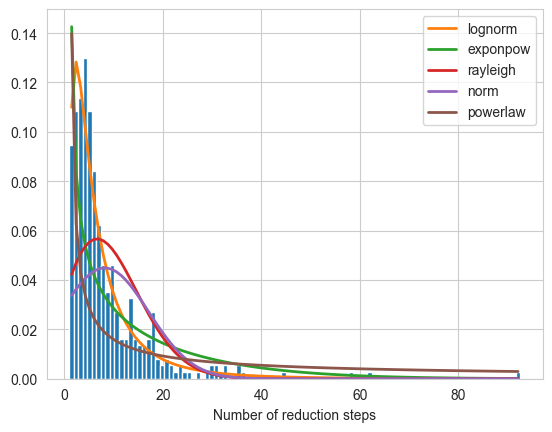

Fitting 8 distributions: 100%|██████████| 8/8 [00:00<00:00, 24.09it/s]

Log Norm distribution params: (1.7056996598766907, 0.8915562002466023); expected value = 8.19181830901414


In [15]:
p = [0.98, 0.005, 0.005, 0.005, 0.005]
steps = [
    sum(
        [
            term.normalize(MixedStrategy(STRATEGIES, p))[1]
            for i in range(RANDOM_AVERAGE_COUNT)
        ]
    )
    / RANDOM_AVERAGE_COUNT
    for term in terms
]
draw_hist(steps)

In [16]:
STRATEGIES

## Run mixed strategy with optimal probabilities from the article:
p_LO = 0.85, p_RI = 0.15

In [19]:
pr_article = [0.85, 0.15, 0, 0, 0]

Fitting 8 distributions: 100%|██████████| 8/8 [00:00<00:00, 24.46it/s]


number of not normalized terms: 0
          sumsquare_error          aic          bic  kl_div  ks_statistic  \
lognorm          0.010799  1185.231823 -4224.497416     inf      0.048224   
chi2             0.013416  1246.162111 -4137.041036     inf      0.098906   
exponpow         0.015087  1375.165214 -4089.721931     inf      0.087521   
rayleigh         0.034767  1873.170704 -3759.281457     inf      0.203133   
powerlaw         0.038208   918.802106 -3715.252270     inf      0.297860   

             ks_pvalue  
lognorm   2.962387e-01  
chi2      6.957887e-04  
exponpow  3.901504e-03  
rayleigh  4.681809e-15  
powerlaw  3.399107e-32  
{'lognorm': {'s': 0.9256218060789347, 'loc': 0.2755150132620634, 'scale': 5.476074078348476}}
Norm distribution: (8.489578163771712, 8.306897374518883)


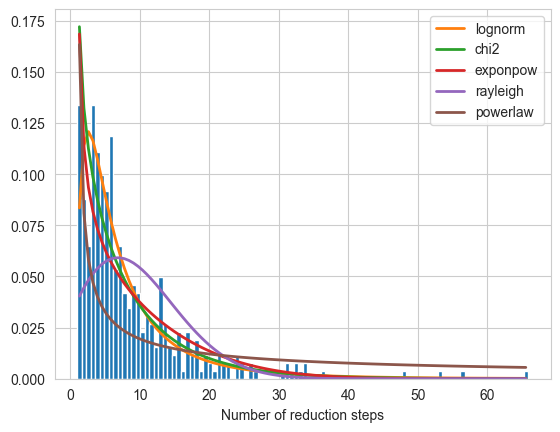

Fitting 8 distributions: 100%|██████████| 8/8 [00:00<00:00, 23.46it/s]

Log Norm distribution params: (1.772503506050114, 0.8628721217003937); expected value = 8.540142170436315


In [20]:
steps_article = [
    sum(
        [
            term.normalize(MixedStrategy(STRATEGIES, pr_article))[1]
            for i in range(RANDOM_AVERAGE_COUNT)
        ]
    )
    / RANDOM_AVERAGE_COUNT
    for term in terms
]

draw_hist(steps_article)

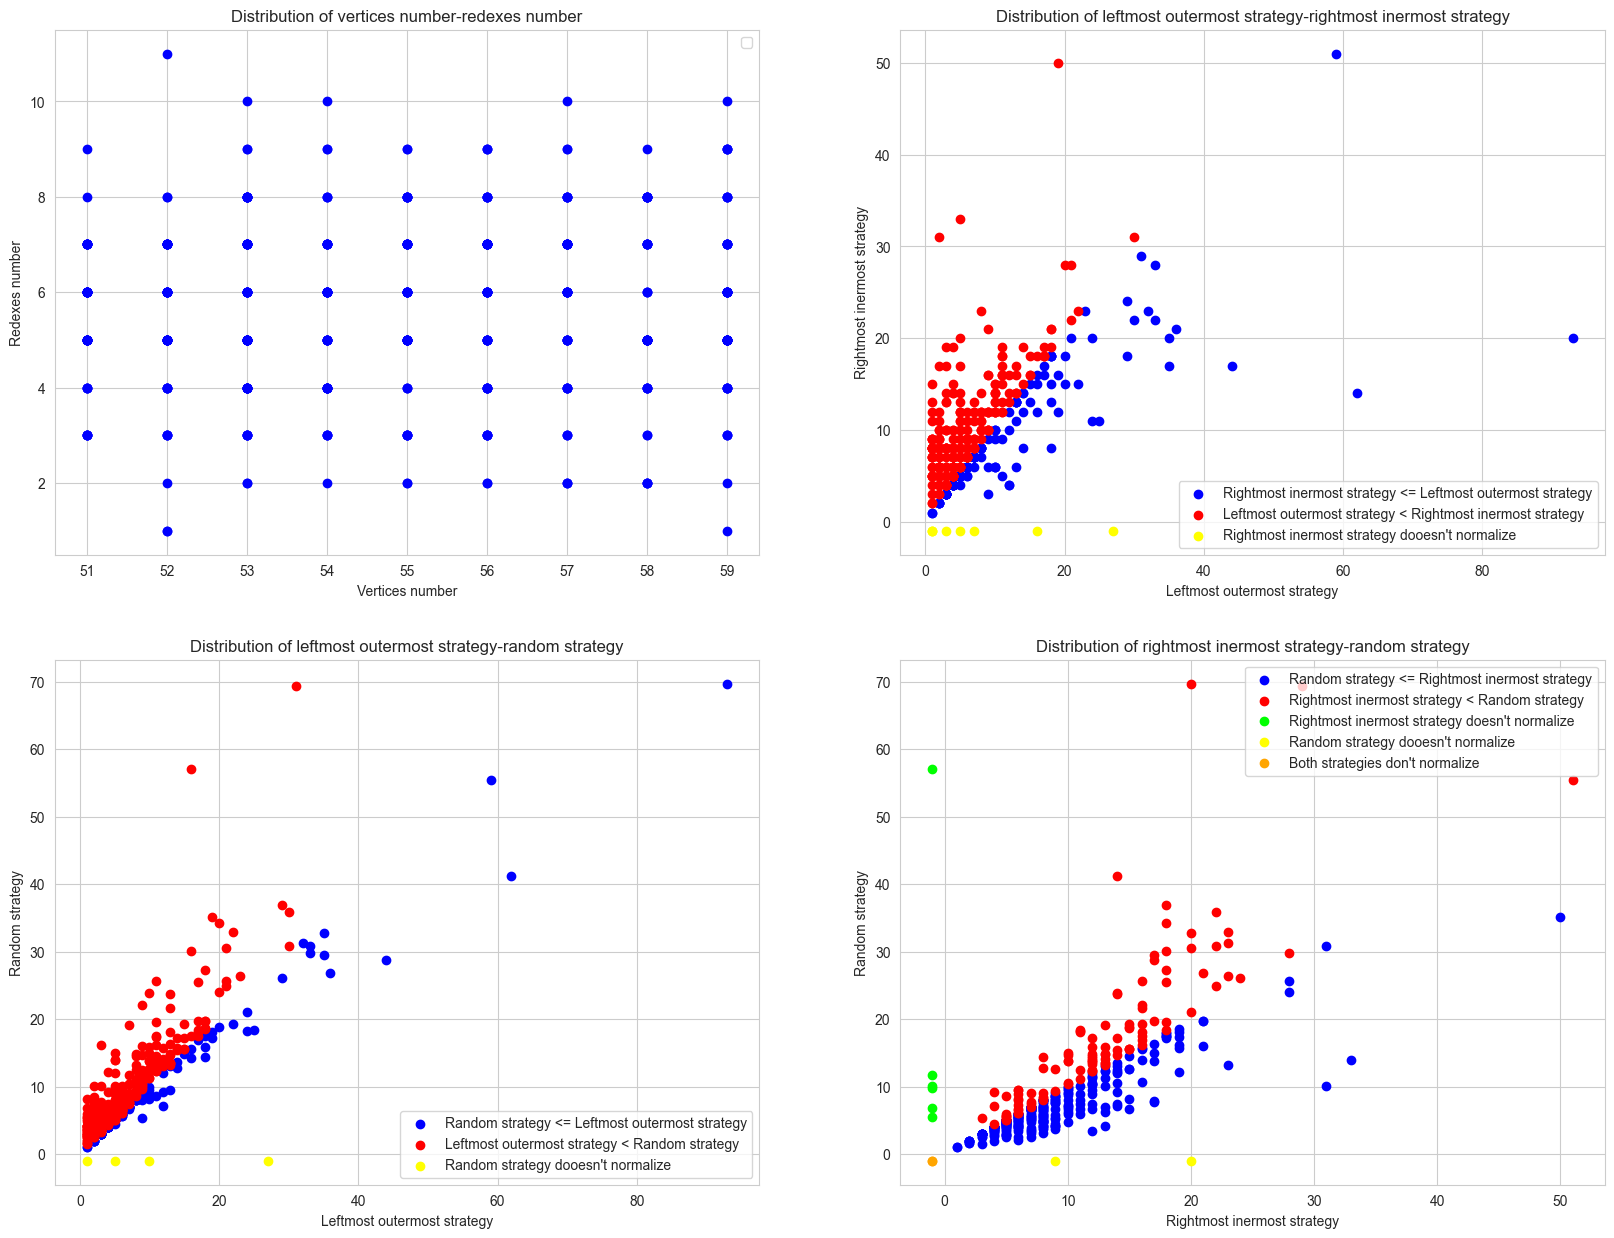

In [21]:
figure, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 15))
ax0, ax1, ax2, ax3 = axes.flatten()

count_vertices = list(map(lambda term: term.verticesNumber, terms))
count_redexes = list(map(lambda term: len(term.redexes), terms))

draw_2d_distribution(
    ax0, count_vertices, count_redexes, "Vertices number", "Redexes number"
)
draw_2d_strategy_distribution(
    ax1, stepsLO, stepsRI, "Leftmost outermost strategy", "Rightmost inermost strategy"
)
draw_2d_strategy_distribution(
    ax2, stepsLO, stepsRand, "Leftmost outermost strategy", "Random strategy"
)
draw_2d_strategy_distribution(
    ax3, stepsRI, stepsRand, "Rightmost inermost strategy", "Random strategy"
)
plt.show()

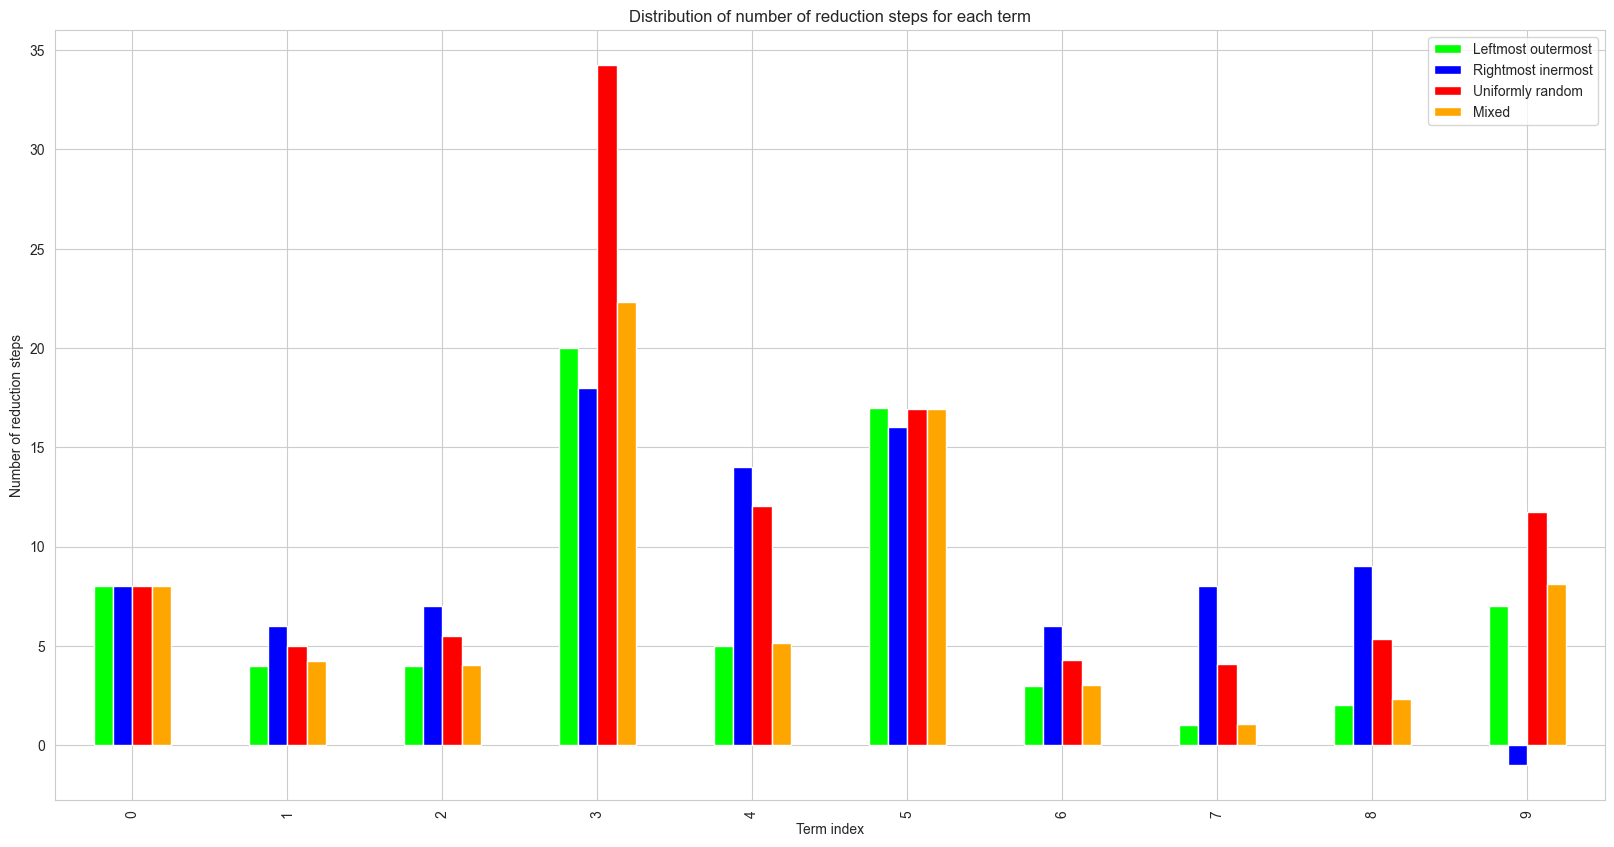

<AxesSubplot: title={'center': 'Distribution of number of reduction steps for each term'}, xlabel='Term index', ylabel='Number of reduction steps'>

In [22]:
colors = ["lime", "blue", "red", "orange"]
labels = ["Leftmost outermost", "Rightmost inermost", "Uniformly random", "Mixed"]
n = 20
draw_plot(
    stepsLO[10:n],
    stepsRI[10:n],
    stepsRand[10:n],
    MixedStrategySteps[10:n],
    labels,
    colors,
)

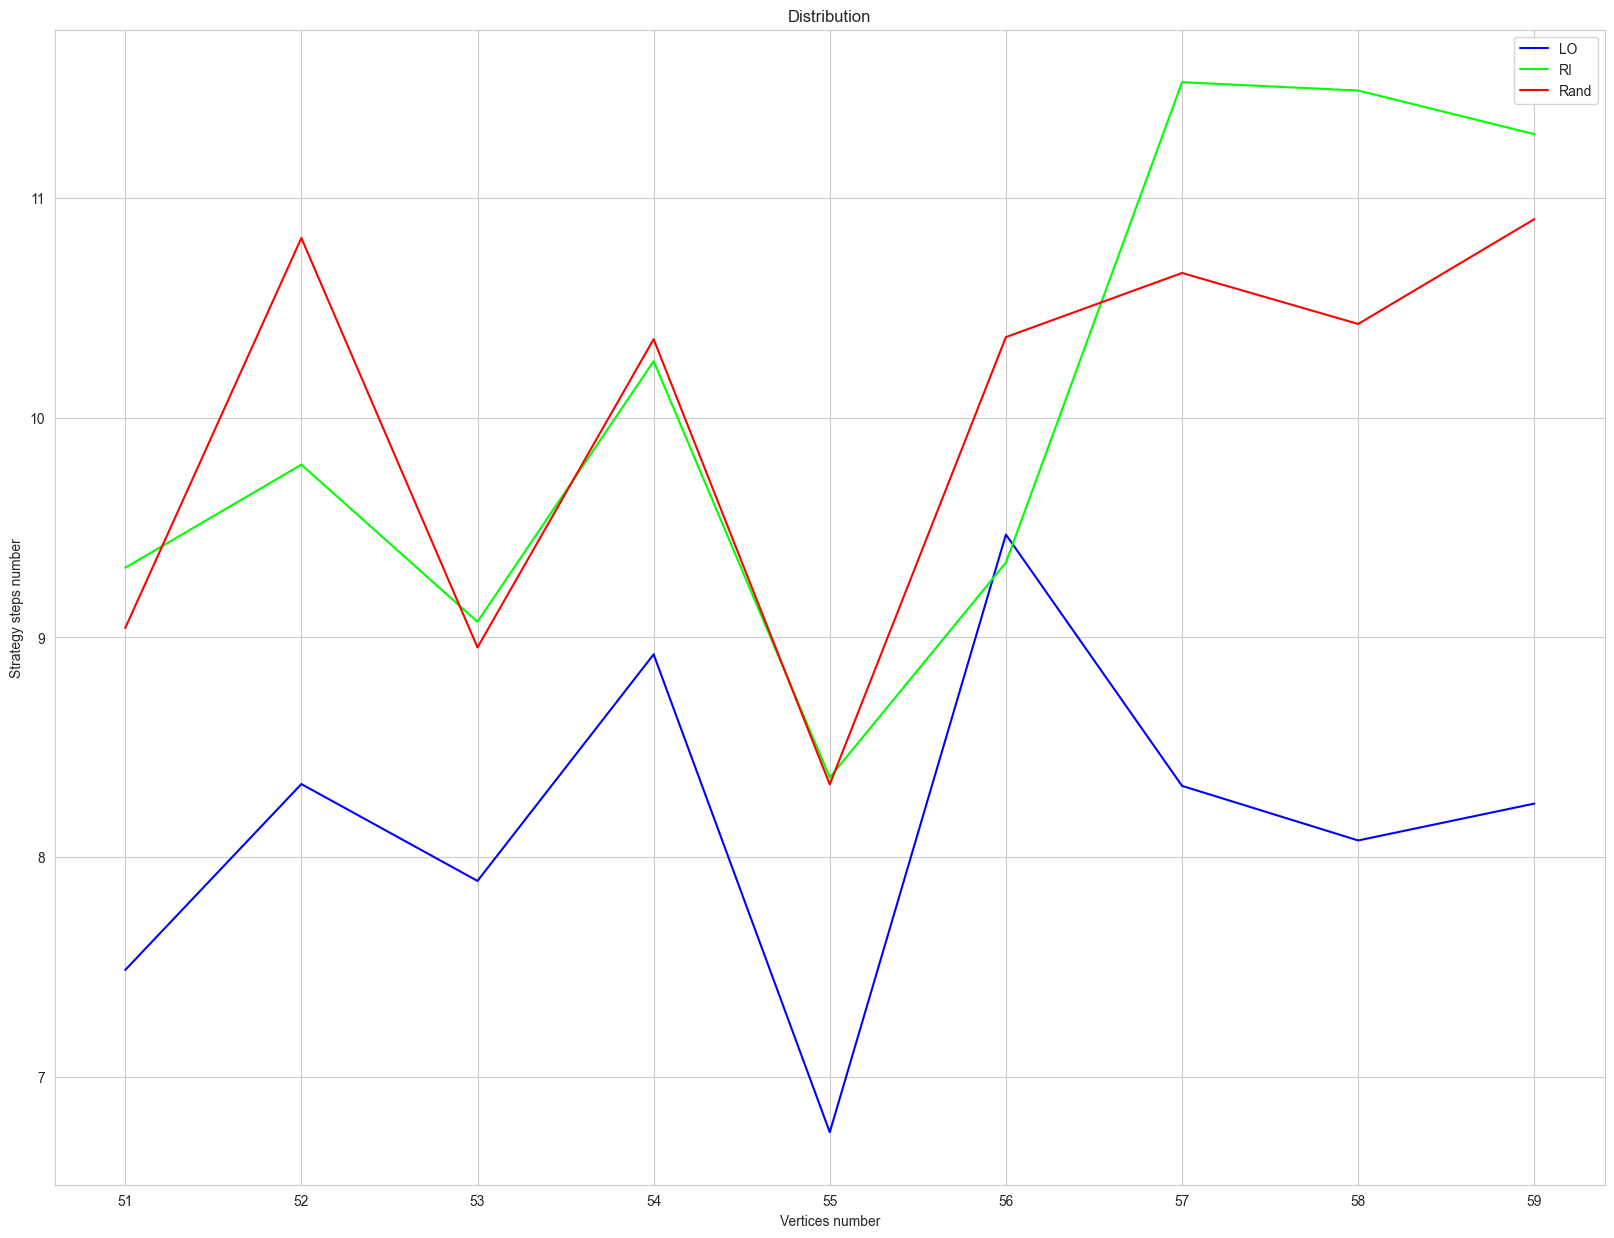

In [24]:
DOWNLIMIT = 50
UPLIMIT = 60

terms_dict = {i: [] for i in range(DOWNLIMIT, UPLIMIT)}

for i, term in enumerate(terms):
    terms_dict[term.verticesNumber].append(
        (term, {"LO": stepsLO[i], "RI": stepsRI[i], "Rand": stepsRand[i]})
    )

average_term_data = dict()
for verticesNumber, data in terms_dict.items():
    data_without_inf = [
        d[1]
        for d in data
        if d[1]["LO"] != float("inf")
        and d[1]["RI"] != float("inf")
        and d[1]["Rand"] != float("inf")
    ]
    avgLO, avgRI, avgRand = 0, 0, 0
    for d in data_without_inf:
        avgLO += d["LO"]
        avgRI += d["RI"]
        avgRand += d["Rand"]

    count = len(data_without_inf)
    if count != 0:
        average_term_data[verticesNumber] = {
            "LO": avgLO / count,
            "RI": avgRI / count,
            "Rand": avgRand / count,
        }

plt.figure(figsize=(20, 15))
ax = plt.gca()
ax.plot(
    list(average_term_data.keys()),
    [data["LO"] for i, data in average_term_data.items()],
    color="blue",
    label="LO",
)
ax.plot(
    list(average_term_data.keys()),
    [data["RI"] for i, data in average_term_data.items()],
    color="lime",
    label="RI",
)
ax.plot(
    list(average_term_data.keys()),
    [data["Rand"] for i, data in average_term_data.items()],
    color="red",
    label="Rand",
)
ax.set(title="Distribution", xlabel="Vertices number", ylabel="Strategy steps number")
ax.legend(prop={"size": 10})

plt.show()

# TESTS

In [25]:
x, y, z = Var(), Var(), Var()
X, Z = Atom(x), Atom(z)
XXX = Application(Application(X, X), X)
XZ = Application(X, Z)
T = Application(Abstraction(x, XXX), Abstraction(x, Application(Abstraction(y, Z), XZ)))

print(T)
for var, item in T._vars.items():
    print("\t{}".format(var), end=": ")
    print(item)

((fun v[16552742] => ((v[16552742] v[16552742]) v[16552742])) (fun v[16552742] => ((fun v[16552743] => v[16552744]) (v[16552742] v[16552744]))))
	v[16552742]: {'free': 0, 'bound': 4}
	v[16552744]: {'free': 2, 'bound': 0}


In [26]:
x, y, z, w, v = Var(), Var(), Var(), Var(), Var()
# (λx.(λy.( ((λz.(y z)) ((λw.w) x)) v )))
lambdaTerm = Abstraction(
    x,
    Abstraction(
        y,
        Application(
            Application(
                Abstraction(z, Application(Atom(y), Atom(z))),
                Application(Abstraction(w, Atom(w)), Atom(w)),
            ),
            Atom(v),
        ),
    ),
)


def testTerm():
    assert len(lambdaTerm.redexes) == 2
    assert lambdaTerm.verticesNumber == 13

    subterm = Application(Atom(y), Atom(z))
    assert lambdaTerm.subterm(1) == lambdaTerm
    assert lambdaTerm.subterm(6) == subterm
    assert lambdaTerm.setSubterm(1, subterm) == subterm

    assert (
        lambdaTerm._updateBoundVariables().verticesNumber == lambdaTerm.verticesNumber
    )
    assert len(lambdaTerm._updateBoundVariables().redexes) == len(lambdaTerm.redexes)

    strategy = LeftmostOutermostStrategy()
    assert len(lambdaTerm._betaConversion(strategy).redexes) == 1
    assert lambdaTerm._betaConversion(strategy).verticesNumber == 10

    assert len(lambdaTerm.normalize(strategy)[0].redexes) == 0
    assert lambdaTerm.normalize(strategy)[1] == 2


def testStrategy():
    strategy = LeftmostOutermostStrategy()
    assert strategy.redexIndex(lambdaTerm) == 4


testTerm()
testStrategy()

Fitting 8 distributions: 100%|██████████| 8/8 [00:00<00:00, 24.32it/s]


number of not normalized terms: 0
          sumsquare_error          aic          bic  kl_div  ks_statistic  \
lognorm          0.003660  1393.762867 -4660.495018     inf      0.084465   
exponpow         0.023893  1755.384258 -3904.446725     inf      0.322726   
rayleigh         0.024640  3095.593044 -3898.036821     inf      0.226636   
norm             0.032631  3421.164525 -3784.834349     inf      0.210907   
powerlaw         0.034446   985.077848 -3757.022275     inf      0.394588   

             ks_pvalue  
lognorm   5.979287e-03  
exponpow  7.479758e-38  
rayleigh  1.132435e-18  
norm      3.309611e-16  
powerlaw  4.477330e-57  
{'lognorm': {'s': 0.9574045874865631, 'loc': 0.242653894384255, 'scale': 5.100390969588415}}
Norm distribution: (8.148883374689825, 8.899642700263527)


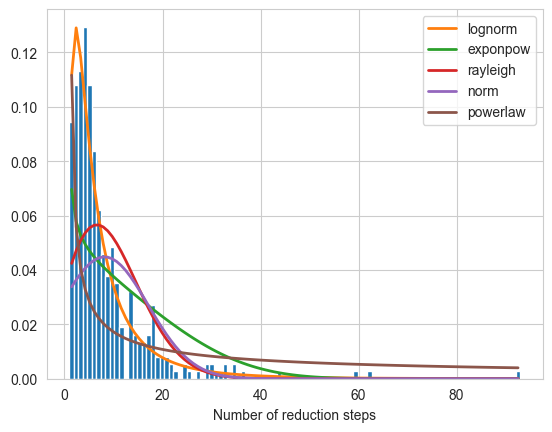

Fitting 8 distributions: 100%|██████████| 8/8 [00:00<00:00, 21.44it/s]

Log Norm distribution params: (1.6995550941829478, 0.8941352513613474); expected value = 8.160406778553488


In [27]:
stepsLOWithoutTail = [x for x in stepsLO if x < 150]
draw_hist(stepsLOWithoutTail)

Fitting 8 distributions: 100%|██████████| 8/8 [00:00<00:00, 35.08it/s]


number of not normalized terms: 0
          sumsquare_error          aic          bic  kl_div  ks_statistic  \
lognorm          0.135351  1120.294225 -3133.678399     inf      0.073900   
chi2             0.137352  1199.184231 -3127.881716     inf      0.091477   
gamma            0.137352  1199.177475 -3127.881386     inf      0.091480   
rayleigh         0.144250  1514.100556 -3114.502771     inf      0.162250   
norm             0.153182  1720.285466 -3090.774061     inf      0.154013   

             ks_pvalue  
lognorm   2.539075e-02  
chi2      2.510233e-03  
gamma     2.509080e-03  
rayleigh  1.490290e-09  
norm      1.199845e-08  
{'lognorm': {'s': 0.5410890309059935, 'loc': -0.6976045836231628, 'scale': 9.243491381061318}}
Norm distribution: (10.010126582278481, 6.313730164615198)


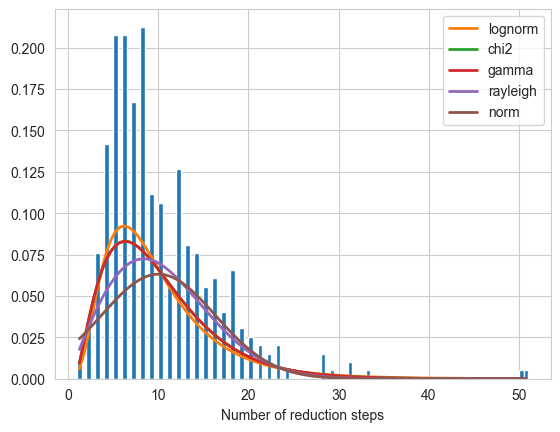

Fitting 8 distributions: 100%|██████████| 8/8 [00:00<00:00, 24.38it/s]

Log Norm distribution params: (2.1307717976891065, 0.5958050557288348); expected value = 10.05694690363323


In [28]:
stepsRIWithoutTail = [x for x in stepsRI if x < 150]
draw_hist(stepsRIWithoutTail)

Fitting 8 distributions: 100%|██████████| 8/8 [00:00<00:00, 27.02it/s]


number of not normalized terms: 0
          sumsquare_error          aic          bic  kl_div  ks_statistic  \
lognorm          0.011624  1224.266231 -4149.054370     inf      0.055435   
gamma            0.017940  1342.246258 -3975.898045     inf      0.098556   
chi2             0.017940  1342.245282 -3975.895631     inf      0.098553   
rayleigh         0.035135  1806.979399 -3713.694897     inf      0.214377   
exponpow         0.040516  1347.017331 -3650.844838     inf      0.156169   

             ks_pvalue  
lognorm   1.657986e-01  
gamma     7.955975e-04  
chi2      7.960164e-04  
rayleigh  1.422732e-16  
exponpow  5.774612e-09  
{'lognorm': {'s': 0.7710068520997513, 'loc': 0.4794776215673213, 'scale': 7.038242742841421}}
Norm distribution: (10.047117794486216, 8.907955131522733)


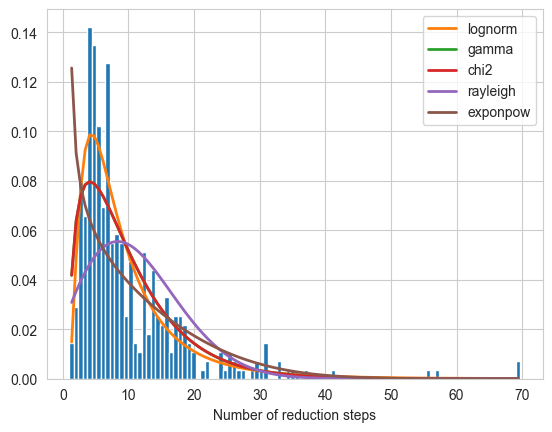

Fitting 8 distributions: 100%|██████████| 8/8 [00:00<00:00, 30.83it/s]

Log Norm distribution params: (2.036165523206631, 0.7117890777094004); expected value = 9.869876777120124


In [29]:
stepsRandWithoutTail = [x for x in stepsRand if x < 150]
draw_hist(stepsRandWithoutTail)

In [41]:
terms_old = terms

In [1]:
terms = (
    terms_old[:110]
    + terms_old[111:232]
    + terms_old[233:363]
    + terms_old[364:382]
    + terms_old[383:]
)

NameError: name 'terms_old' is not defined

In [2]:
results = []
values = list(range(0, 101, 5))
iters = len(values) - 1
for inx, p_lo in enumerate(values):
    p = (p_lo / 100, 1 - p_lo / 100)
    steps = [
        sum(
            [
                term.normalize(
                    MixedStrategy(
                        [LeftmostOutermostStrategy(), RightmostInnermostStrategy()], p
                    )
                )[1]
                for i in range(RANDOM_AVERAGE_COUNT)
            ]
        )
        / RANDOM_AVERAGE_COUNT
        for term in tqdm(terms, desc=f"it {inx} / {iters}")
    ]
    steps = list(filter(lambda x: x != float("inf"), steps))
    steps = list(filter(lambda x: x != 0, steps))

    distributions = get_common_distributions()
    distributions.remove("expon")
    f_ln = Fitter([np.log(step) for step in steps], distributions=distributions)
    f_ln.fit()

    mu, sigma = f_ln.fitted_param["norm"]
    result = np.e ** (mu + (sigma**2) / 2)
    results.append(result)

plt.plot(values, results)
plt.xlabel("p_LO")
plt.ylabel("Expected number of steps")
plt.show()

NameError: name 'tqdm' is not defined

In [59]:
inf_inxs = []
for i in range(len(stepsRI)):
    if stepsRI[i] == np.inf:
        inf_inxs.append(i)

print(inf_inxs)

[19, 110, 232, 254, 256, 329, 363, 382]
